# Compare the analytical solution and the neural net mask

In [82]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [83]:
import sys
sys.path.append("..")
import os
from utils.model import Net_mask
from utils.data import Data
from scripts.parameters import get_parameters, get_parameters_1
import torch
import numpy as np
import matplotlib.pyplot as plt

In [84]:
tensor_mu_m, tensor_Sigma_m, tensor_mu_eps, tensor_Sigma_eps, tensor_Q_m, sigma2_eps, tau2 = get_parameters()
tensor_mu_m2, tensor_Sigma_m2, tensor_mu_eps2, tensor_Sigma_eps2, tensor_Q_m2, sigma2_eps2, tau22 = get_parameters_1()
data_generator = Data(tensor_mu_m, tensor_Sigma_m, tensor_mu_eps, tensor_Sigma_eps)
data_generator2 = Data(tensor_mu_m2, tensor_Sigma_m2, tensor_mu_eps2, tensor_Sigma_eps2)

In [85]:
tensor_raw = data_generator.get_tensor_data(1)
tensor_raw = torch.zeros(20)
tensor_raw[0] = 2.5
tensor_raw[2] = -1
tensor_raw[9] = 2.5
tensor_raw[10] = 1
tensor_raw[12] = 1
tensor_raw[19] = 1
tensor_raw = tensor_raw.unsqueeze(0)

tensor([ 0.0044, -0.0126,  0.0315,  0.2988, -0.9053,  0.2839,  0.0536, -0.0112,
        -0.0085, -0.0029], grad_fn=<SliceBackward0>)
tensor([ 0.0132,  0.0108, -0.0049, -0.0020, -0.2986,  1.0052, -0.2287, -0.0202,
        -0.0142, -0.0108], grad_fn=<SliceBackward0>)
tensor([-0.0267,  0.0021,  0.0280,  0.0229,  0.3822, -0.5341,  0.3299,  0.2135,
         0.1842,  0.2673], grad_fn=<SliceBackward0>)
tensor([-0.0107,  0.0075, -0.0180, -0.0266, -0.0479, -0.0825, -0.2408,  0.9857,
        -0.2346, -0.0158], grad_fn=<SliceBackward0>)
tensor([-0.1314,  0.1894, -0.4793,  0.1974,  0.0121, -0.2722, -0.5264,  0.0598,
        -0.0125, -0.1315], grad_fn=<SliceBackward0>)
tensor([ 1.2224e-02, -1.0071e-02, -4.9284e-04, -1.2298e-02,  5.0351e-02,
         5.8656e-02,  2.2884e-01, -1.0004e+00,  2.0954e-01,  2.1953e-02],
       grad_fn=<SliceBackward0>)
tensor([-0.0310, -0.0020,  0.0196, -0.0053, -0.2282,  0.9905, -0.2410, -0.0671,
        -0.0357, -0.0421], grad_fn=<SliceBackward0>)
tensor([-0.0025,  0.01

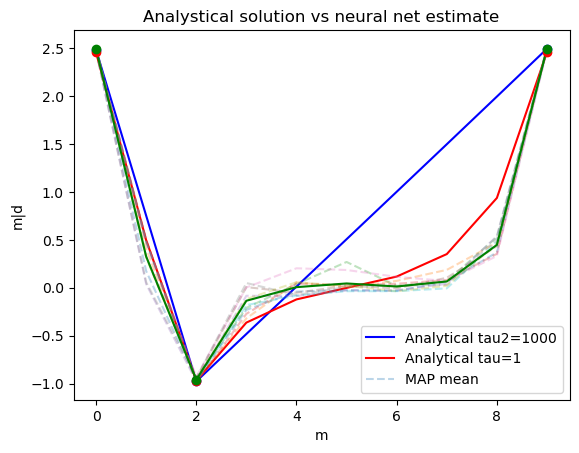

In [89]:
# Getting tensor
n_param = 10
input_tensor = tensor_raw[0]
d = input_tensor[:10]
mask = input_tensor[10:]
location_raw = torch.where(mask > 0.5)
location = location_raw[0]
post_mean, _ = data_generator.get_tensor_posterior(input_tensor)
post_mean2, _ = data_generator2.get_tensor_posterior(input_tensor)

# Plotting model estimates
outer_dir = 'map_comp2'
rootdir = "../saved_models/" + str(outer_dir)
model = Net_mask()
names = []
for subdir, dirs, files in os.walk(rootdir):
    folders = dirs
    count = len(folders)
    break

plt.plot(range(10), post_mean, 'b')
plt.plot(range(10), post_mean2, 'r')
sum_tensor = torch.zeros(n_param)
for f in folders: 
    name = '../saved_models/' + str(outer_dir) + '/' + str(f) + '/' + 'model_weights.pth'
    model.load_state_dict(torch.load(name))
    model.eval()
    print(list(model.parameters())[0][0][:10])
    out_raw = model(tensor_raw)
    out = out_raw[0].detach()
    #print(out.size())
    #print(out)
    sum_tensor += out
    #plt.plot(range(10), post_mean)
    #plt.plot(range(10), out)
    #out = out + torch.randn(10)*0.01

    #if f == '0':
    #    plt.plot(range(10), out, 'g')#, 'o')
    #    plt.plot(location, out[location_raw], 'go')
    #else:
    #    plt.plot(range(10), out, '--', alpha=0.5)#, 'o')
    plt.plot(range(10), out, '--', alpha=0.3)#, 'o')

    #plt.plot(location, out[location_raw], 'o')
    #names.append(str(f))
    #print(out)
plt.plot(range(10), sum_tensor/count, 'g')
plt.title("Analystical solution vs neural net estimate")
plt.xlabel("m")
plt.ylabel("m|d")
plt.plot(location, post_mean[location_raw], 'bo')
plt.plot(location, post_mean2[location_raw], 'ro')
plt.plot(location, (sum_tensor/count)[location_raw], 'go')
names.append("Analytical tau2=1000")
names.append("Analytical tau=1")
names.append("MAP mean")
plt.legend(names)
#plt.legend()